<a href="https://colab.research.google.com/github/tennille-bernard/Kal-Academy-Assignments/blob/main/Assignment_1_house_price_TB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a regression model to predict house price, using the dataset from https://www.kaggle.com/datasets/shilpitha/house-price-prediction

This may be Multiple Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv('kc_house_data.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let's get information on the data set, namely the data types

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Assumptions:  


*   Price (label) is likely affected by bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, condition, yr_built, yr_renovated, zipcode



Iterative process to identify which features have an effect on the label

In [ ]:
#X = dataset.iloc[:, 3:].values
#y = dataset.iloc[:, 2].values

features = [ 'bedrooms', 'bathrooms',  'waterfront','view' ,'condition', 'grade','yr_built','zipcode','lat', 'zipcode']
labels = ['price']

#removed , 'long','sqft_living','sqft_lot','floors','sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15'
# See file https://docs.google.com/spreadsheets/d/1SDHxovzFRkQIGgv_yDlc70AGRxhTtgQe5oljuBEhd54/edit?usp=sharing for a list of all the combinations of features run and the resulting R2 values that led to this combination.

X = dataset[features]
y = dataset[labels]

Understanding the relationship between price and


*   bedrooms
*   bathrooms
*   waterfront
*   view
*   condition  
*   grade
*   yr_built
*   lat

Using a scatterplot graph to see the shape of the data




In [ ]:
'''import plotly as py
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)'''


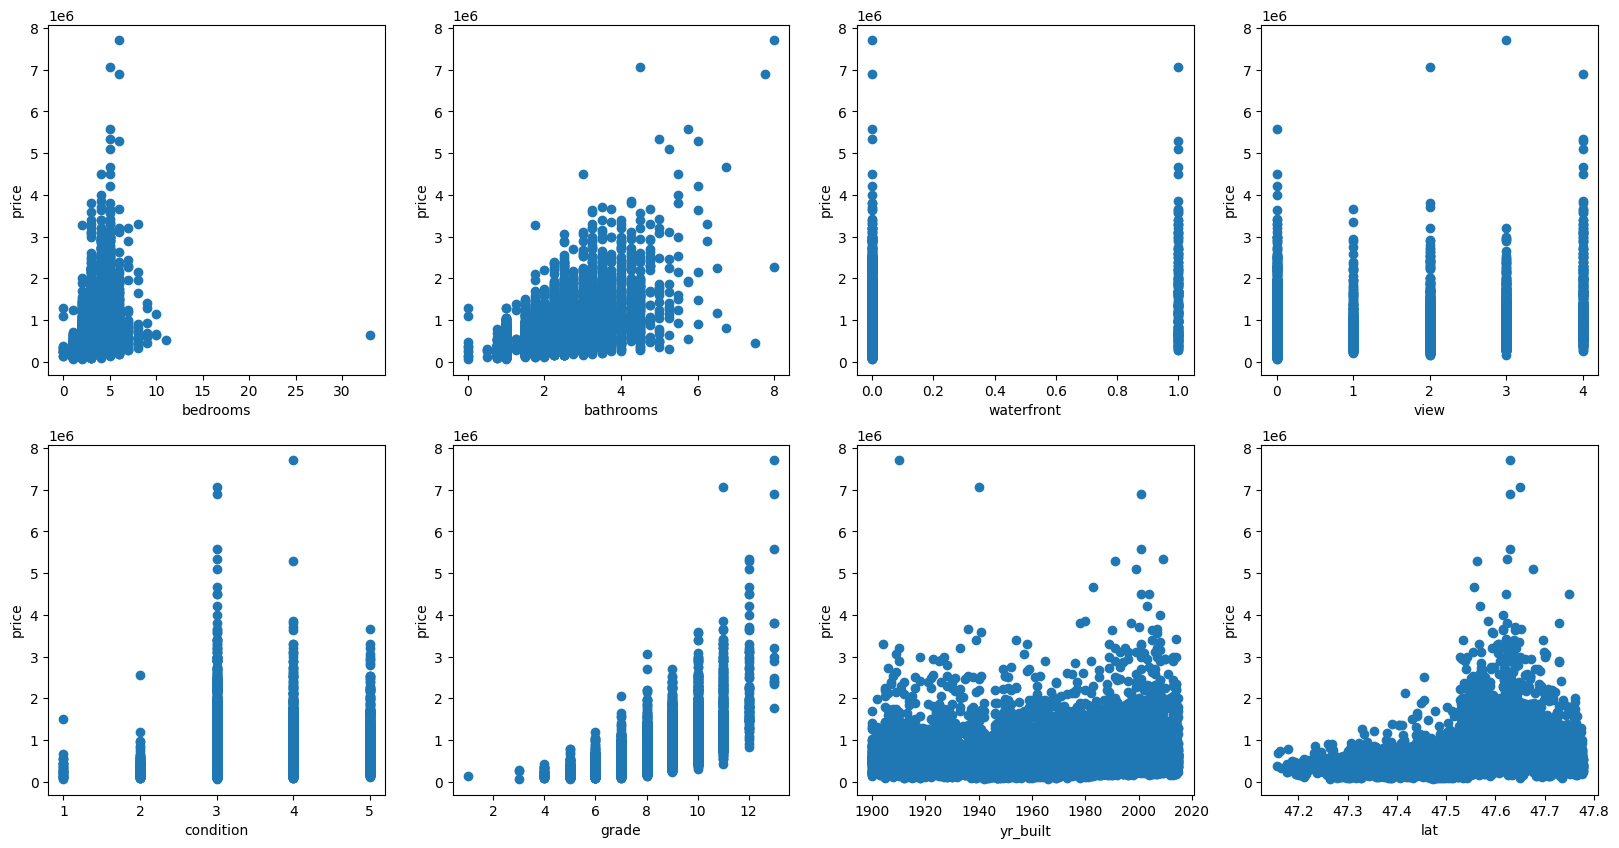

In [ ]:
fig, axs = plt.subplots(2,4, figsize=(20, 10))
axs[0,0].scatter(dataset['bedrooms'], dataset['price'])
axs[0,0].set_xlabel('bedrooms')
axs[0,0].set_ylabel('price')
axs[0,1].scatter(dataset['bathrooms'], dataset['price'])
axs[0,1].set_xlabel('bathrooms')
axs[0,1].set_ylabel('price')
axs[0,2].scatter(dataset['waterfront'], dataset['price'])
axs[0,2].set_xlabel('waterfront')
axs[0,2].set_ylabel('price')
axs[0,3].scatter(dataset['view'], dataset['price'])
axs[0,3].set_xlabel('view')
axs[0,3].set_ylabel('price')
axs[1,0].scatter(dataset['condition'], dataset['price'])
axs[1,0].set_xlabel('condition')
axs[1,0].set_ylabel('price')
axs[1,1].scatter(dataset['grade'], dataset['price'])
axs[1,1].set_xlabel('grade')
axs[1,1].set_ylabel('price')
axs[1,2].scatter(dataset['yr_built'], dataset['price'])
axs[1,2].set_xlabel('yr_built')
axs[1,2].set_ylabel('price')
axs[1,3].scatter(dataset['lat'], dataset['price'])
axs[1,3].set_xlabel('lat')
axs[1,3].set_ylabel('price')
plt.show()

From the data we see:  


*   The number of **bedrooms** has a large effect on price until **bedrooms = 5**; after this point, the price begins declining.
*   The the presence of the **waterfront** and the **view** does not have  correlation to the price.
*   There may be some correlation to the number of **bathrooms** and the **condition**. For number of bathrooms, we notice an upward trend in price as the # of **bathrooms** increases (noting that the spread of data increases as well). For **condition**, we notice that a few houses with the **condition = 3 ** tend to command the highest price, followed then where **condition = 4**, and **condition = 5**.
*   **Grade** follows a similar upward trend as bathrooms.
*   **Yr_built** seems to have no real correlation as it trends relatively evenly from 1900 to 2020, save for a few outliers.
*   **lat** seems to have an effect between **47.5 - 47.7**. Per Google, 0.1 degree lat = 6.9 miles.




Separating test data from training data

Since we're here, let's see if there is any correlation between:


*   long
*   sqft_living
*   sqft_lot
*   floors
*   sqft_above
*   sqft_basement
*   yr_renovated
*   sqft_living15
*   sqft_lot15
*   zipcode



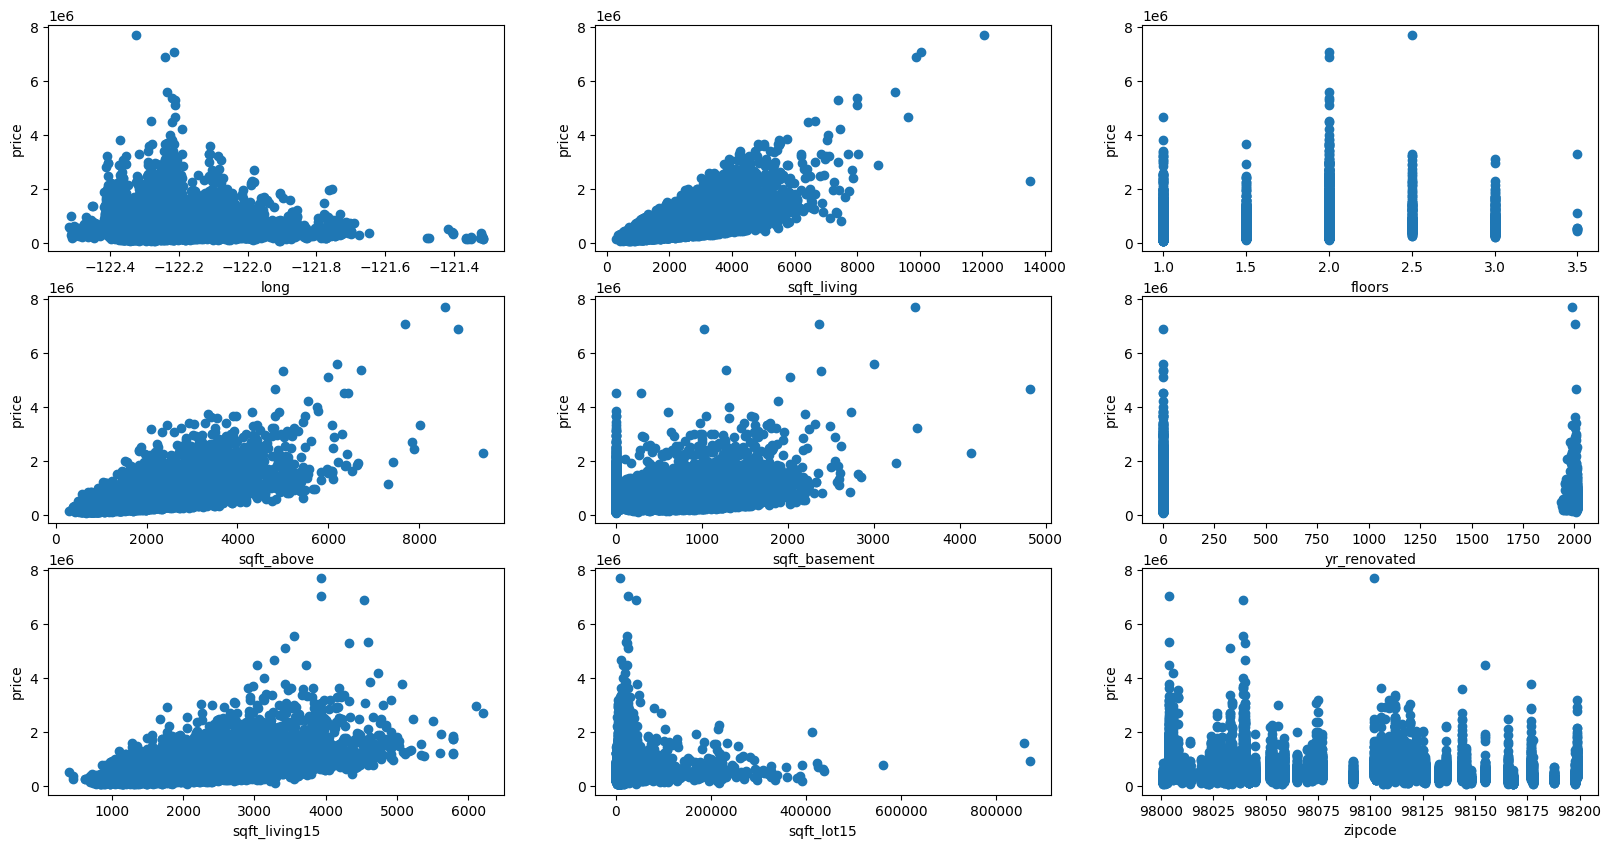

In [ ]:
fig, axs = plt.subplots(3,3, figsize=(20, 10))
axs[0,0].scatter(dataset['long'], dataset['price'])
axs[0,0].set_xlabel('long')
axs[0,0].set_ylabel('price')
axs[0,1].scatter(dataset['sqft_living'], dataset['price'])
axs[0,1].set_xlabel('sqft_living')
axs[0,1].set_ylabel('price')
axs[0,2].scatter(dataset['floors'], dataset['price'])
axs[0,2].set_xlabel('floors')
axs[0,2].set_ylabel('price')
axs[1,0].scatter(dataset['sqft_above'], dataset['price'])
axs[1,0].set_xlabel('sqft_above')
axs[1,0].set_ylabel('price')
axs[1,1].scatter(dataset['sqft_basement'], dataset['price'])
axs[1,1].set_xlabel('sqft_basement')
axs[1,1].set_ylabel('price')
axs[1,2].scatter(dataset['yr_renovated'], dataset['price'])
axs[1,2].set_xlabel('yr_renovated')
axs[1,2].set_ylabel('price')
axs[2,0].scatter(dataset['sqft_living15'], dataset['price'])
axs[2,0].set_xlabel('sqft_living15')
axs[2,0].set_ylabel('price')
axs[2,1].scatter(dataset['sqft_lot15'], dataset['price'])
axs[2,1].set_xlabel('sqft_lot15')
axs[2,2].set_ylabel('price')
axs[2,2].scatter(dataset['zipcode'], dataset['price'])
axs[2,2].set_xlabel('zipcode')
axs[2,2].set_ylabel('price')
plt.show()

From the data we see
*   price peaks at about -122 **long ** then shows a decreasing trend
*   as **sqft_living**, **sqft_above** increases, we see a slight increase in price
*   While **2 floors** seems to command the highest price, there is no real correlation otherwise
*   No observable correlation between price and **sqft_basement**.
*   **Yr_renovated** is interesting. At first glance, there are two modes, but mode 1 occurs at yr_renovated = 0, which seems unlikely. I'm assuming that this data was not available and rather than leave it blank, zeros were filled in. If we focus on the second mode around 2000 we see what looks like an upward trend. I'm tempted to include this data in the model, understanding that without further cleaning, this will affect the model.
*   **sqft_living15** shows some positive correlation with price.
*   **sqft_lot15** shows an initial positive correlation with price but a strong negative correlation with price as it increases.
*   **zipcode** is not clear. TBD.

**Data Processing**  


In [ ]:
#Remove where yr_renovated = 0 from data
df1 = dataset.drop(dataset[dataset['yr_renovated'] == 0].index)

#Remove where bedroom >= 10
df1 = dataset.drop(dataset[dataset['bedrooms'] >= 10].index)


**Revising model so that**  
features = bedrooms, bathrooms, condition, grade, lat, long, sqft_living, long, yr_renovated, sqft_living15, sqft_lot15

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#X = dataset.iloc[:, 3:].values
#y = dataset.iloc[:, 2].values

#First run model
#features = [ 'bedrooms', 'bathrooms',  'condition','grade' ,'lat', 'long','sqft_living','long','yr_renovated','sqft_living15', 'sqft_lot15']
#labels =['price']

#Best model so far
features = [ 'bedrooms', 'bathrooms',  'waterfront','view' ,'condition', 'grade','yr_built','zipcode','lat']
labels = ['price']

X = df1[features]
y = df1[labels]

**Dividing model into training and testing sets**

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)
print(X_test)

[[-0.41  0.49 -0.63  1.14 -0.49  1.05]
 [ 2.9   0.49  0.91  0.29 -0.37 -0.88]
 [-1.51 -1.44 -0.63 -1.41  0.52 -0.2 ]
 ...
 [-1.51  0.17 -0.63 -0.56  1.03  1.03]
 [-1.51 -0.15  0.91 -0.56  0.58  0.54]
 [ 0.69  0.17 -0.63 -0.56 -1.31  0.38]]
[[-1.51 -0.8  -0.63  0.29  0.47  0.9 ]
 [ 0.69  0.82 -0.63 -0.56  0.69  0.87]
 [ 0.69  0.82 -0.63  1.14 -0.49  1.06]
 ...
 [-0.41  0.17 -0.63 -0.56  0.52 -0.11]
 [-0.41  1.14 -0.63  1.99 -0.93  1.25]
 [-0.41  0.49 -0.63  0.29  0.69  0.83]]


**Applying a multiple linear regression model**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[ 581912.44  680200.  ]
 [ 534961.22  550000.  ]
 [ 882332.37  780000.  ]
 ...
 [ 396515.29  330000.  ]
 [1070836.93  600000.  ]
 [ 669219.07  800000.  ]]


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2: ", r2 )

R2:  0.546511053334369


**Let's try a polynomial linear regression model**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)


LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
#r2 = r2_score(y_test, y_pred_poly)
#lin_reg_2.predict(poly_reg.fit_transform(X)))
r2 = r2_score(y, lin_reg_2.predict(poly_reg.fit_transform(X)))

print("R2: ", r2 )

R2:  0.7601643460630977


This model is better fit at ~0.76.